<a href="https://colab.research.google.com/github/qkd8059/Capstone/blob/main/Copy_of_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install dnspython
# !pip install hmmlearn

In [ ]:
from regime_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from database_main import Database

# lookback = 12
# lookback = 26
lookback = 12
# lookback = 104
target_return = 0.1*lookback/52
principal = 30000
risk_appetite = 0.8
# card = 4
# card = 6
card = 10
# card = 10
horizon = 200
mu, Q, weight, ticker, ticker_index = Regime_test.single_period(lookback,target_return,principal,risk_appetite,card,horizon)
print(weight, ticker)
Regime_test.plot_pie(weight, ticker)

# act_annual, act_std, act_sr = Regime_test.stats(cum_ret,700)
# print(act_annual, act_std, act_sr)

# df = Database.read_data("SP500Tickers")
# full_name = []
# sector = []
# for j in range(0,card):
#     for i in range(0,len(df['Symbol'])):
#         if df['Symbol'][i] == ticker[j]:
#             ind = df['Symbol'][i]
#             full_name.append(df['Name'][i])
#             sector.append(df['Sector'][i])
            
# #print(full_name)
# #print(sector)
        
# data = {'Ticker':ticker,'Weight':weight,'Name':full_name,'Sector':sector}       
# df = pd.DataFrame(data,columns = ['Ticker','Weight','Name','Sector'])
# #print(df)

# Database.clean_col_save(df,"portfolio")


In [ ]:
print(len(mu))

In [ ]:
print(mu)
print(ticker)

In [ ]:
def lookupCollection(rebalancing_period,risk_appetite,cardinality):
  return 'timeseries_L'+str(rebalancing_period)+'_C'+str(cardinality)+'_R'+str(risk_appetite)

In [ ]:
print(len(mu))

In [ ]:
print(list(ticker_index))
count = 0
port_return = 0
for elem in list(ticker_index):
  port_return += mu[elem]*weight[count]
  count += 1
  print(mu[elem])
  #print(weight)

In [88]:
def master(target_return, start_time, time_horizon, principal, cardinality, objective_1, objective_2, rebalance_freq, risk_appetite):
  #Note:
  # target_return please provide annual value. 
  # time_horizon please provide in terms of weeks. i.e. 1year would be 52
  # cardinality can take value 4, 6, 8 and 10.
  # Rebalancing Frequency please provide in terms of weeks. It can take value 12, 26, 52, 104. 
  # Risk appetite: 0.2, 0.5, 0.8

  from database_main import Database
  from regime_test import Regime_test
  import numpy as np
  import pandas as pd
  dates = Database.read_data('timeseries_dates')
  start_period = np.floor(time_horizon/4).astype(int)
  date_list = dates['Date'].values.tolist()
  df = pd.DataFrame(date_list[-start_period:])
  normalized_dates = []
  for elem in df.values.tolist():
    normalized_dates.append(elem[0])
  #Read portolio constructed based on user input
  df = Database.read_data('timeseries_L'+str(rebalance_freq)+'_C'+str(cardinality)+'_R'+str(risk_appetite)) 
  cum_ret = df['ret'].values.tolist()
  #Read benchmark #1, S&P500 Index
  df_SPY = Database.read_data('SPY_ret')
  SPY_ret = df_SPY['cum ret'].values.tolist()
  #Read benchmark #2, 60/40 Index Fund
  df_6040 = Database.read_data('6040fund_ret') 
  SPY6040_ret = df_6040['cum ret'].values.tolist()

  #Partition the back-testing result to display, based on user's investment horizon
  normalized_ret = Regime_test.plot_horizon(cum_ret,time_horizon)
  normalized_SPY_ret = Regime_test.plot_horizon(SPY_ret,time_horizon)
  normalized_6040_ret = Regime_test.plot_horizon(SPY6040_ret,time_horizon)
  normalized_dates = normalized_dates[:]
  #Do the optimization to generate weights
  weight, ticker_label = Regime_test.single_period(lookback = rebalance_freq, target_return = (target_return/(52/rebalance_freq)), principal = principal, risk_appetite=risk_appetite, card = cardinality, horizon = time_horizon)
  #Calculate Stats based on the back-testing period length, which is ppl's investment horizon
  annual_return, annual_std, sharpe_ratio = Regime_test.stats(normalized_ret,time_horizon)
  annual_return_SPY, annual_std_SPY, sharpe_ratio_SPY = Regime_test.stats(normalized_SPY_ret,time_horizon)
  annual_return_6040, annual_std_6040, sharpe_ratio_6040 = Regime_test.stats(normalized_6040_ret,time_horizon)

  return ticker_label, weight, annual_return, annual_std, sharpe_ratio, normalized_dates, normalized_ret, normalized_SPY_ret, normalized_6040_ret, annual_return_SPY, annual_std_SPY, sharpe_ratio_SPY, annual_return_6040, annual_std_6040, sharpe_ratio_6040

In [115]:
ticker_label, weight, annual_return, annual_std, sharpe_ratio, normalized_dates, normalized_ret, normalized_SPY_ret, normalized_6040_ret, annual_return_SPY, annual_std_SPY, sharpe_ratio_SPY, annual_return_6040, annual_std_6040, sharpe_ratio_6040 = master(target_return = 0.2, start_time = 0, time_horizon = 300, principal = 10000, cardinality = 10, objective_1 = 0, objective_2 = 0, rebalance_freq = 104, risk_appetite = 0.2)

In [110]:
print(normalized_ret)
print(normalized_SPY_ret)
print(normalized_dates)
print(annual_return, annual_std, sharpe_ratio, annual_return_SPY, annual_std_SPY, sharpe_ratio_SPY, annual_return_6040, annual_std_6040, sharpe_ratio_6040)

[1.0, 1.001116988616054, 1.0283887031225145, 1.0873404273775091, 1.0416916373770366, 1.0566400433334526, 1.1261376084356947, 1.121517887640151, 1.1980453888059965, 1.2234809129646862, 1.236583613933936, 1.1874686635017107, 1.1777240478189264, 1.1582001903128867, 1.160670584490972, 1.139423191109553, 1.1327767457245115, 1.1466773780186088, 1.1330872935329923, 1.044879960843943, 1.0206209933027914, 1.0012741793118984, 0.9492616441409649, 1.069446641657863, 1.0959967721701442, 1.1006433386999566, 1.1137170013855506, 1.0681218978613871, 1.1220568038963967, 1.1291978766987865, 1.0627744239757395, 1.0772575906355997, 1.0760864658091716, 1.1966438188736523, 1.2324681713591925, 1.250761121201319, 1.1960154847314766]
[1.0, 1.0099261395335104, 1.0253245142419207, 1.0363776909517548, 1.0523626319737927, 1.034587355427842, 1.0622092642233691, 1.0921554131277922, 1.1056063831402367, 1.1373924774291915, 1.1772642806518512, 1.1860047717248967, 1.1585775793649387, 1.1375824822884177, 1.152323861913065

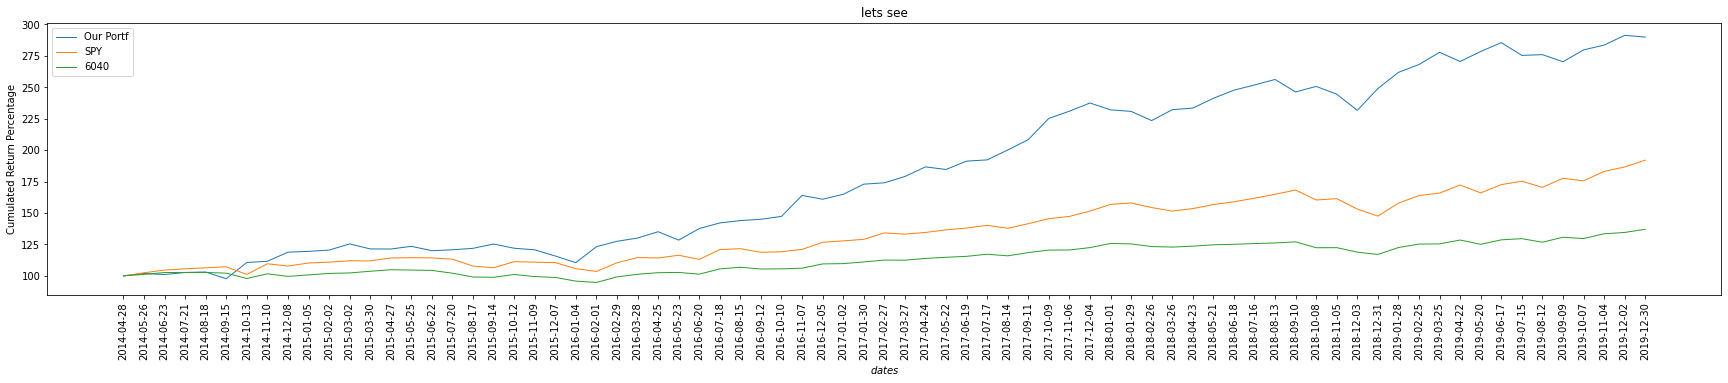

In [116]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,5))
plt.plot(normalized_dates, np.asarray(normalized_ret[:])*100, linewidth=1)    #Using 95% VaR, 1000 times simulation, theta = 1.96
plt.plot(normalized_dates, np.asarray(normalized_SPY_ret[:])*100, linewidth=1)     #Using 95% VaR, 1000 times simulation,
plt.plot(normalized_dates, np.asarray(normalized_6040_ret[:])*100, linewidth=1)
#plt.plot(dates,np.asarray(SPY_act_return[:-1])*100, 'k--',linewidth = 1)    #Use SPY, a S&P 500 tracking ETF as benchmark
# plt.plot(date_list[:-1], np.asarray(Sharpe_cum_ret_act)*100, linewidth=1)
# plt.plot(date_list[:-1], np.asarray(RP_cum_ret_act)*100, linewidth=1)
plt.legend(['Our Portf','SPY','6040'])
plt.xlabel('$dates$')
plt.ylabel('Cumulated Return Percentage')
plt.xticks(rotation=90)
plt.title('lets see')
plt.show()